In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training7.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,0,0,0,0,0,1,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,0,0,0,0,0,1,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,0,0,0,0,0,1,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,0,1,0,0,0,0,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,0,0,0,0,0,1,0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.084284,0.334901,0.263843,0.790982,-0.077856,0.522897,0.507101,0.475241,0.386420,-0.011378,...,-0.242598,NaN,-0.118069,-0.050686,-0.015525,-0.046480,-0.153990,0.352060,NaN,1.000000
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,-0.225013,NaN,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,NaN,0.790982
GrLivArea,0.074853,0.368392,0.263116,0.593007,-0.079686,0.199010,0.287389,0.389893,0.208171,-0.009640,...,-0.121102,NaN,-0.041173,-0.040208,0.032283,-0.007743,-0.091572,0.163239,NaN,0.708624
GarageCars,-0.040110,0.269729,0.154871,0.600671,-0.185758,0.537850,0.420622,0.363778,0.224054,-0.038264,...,-0.197458,NaN,-0.110124,-0.106443,0.028378,-0.010589,-0.121886,0.282164,NaN,0.640409
GarageArea,-0.098672,0.323663,0.180403,0.562022,-0.151521,0.478954,0.371600,0.372567,0.296970,-0.018227,...,-0.218665,NaN,-0.096837,-0.101277,-0.005458,-0.016173,-0.130874,0.294714,NaN,0.623431
TotalBsmtSF,-0.238518,0.363358,0.260833,0.537808,-0.171098,0.391452,0.291066,0.362452,0.522396,0.104810,...,-0.212851,NaN,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268,NaN,0.613581
1stFlrSF,-0.251758,0.414266,0.299475,0.476224,-0.144203,0.281986,0.240379,0.342160,0.445863,0.097117,...,-0.198056,NaN,-0.030196,-0.037451,0.068107,0.021949,-0.158772,0.221037,NaN,0.605852
FullBath,0.131608,0.180424,0.126031,0.550600,-0.194149,0.468271,0.439046,0.275730,0.058543,-0.076444,...,-0.161352,NaN,-0.093473,-0.006193,0.016794,-0.003225,-0.110040,0.232767,NaN,0.560664
BsmtQual_Ex,-0.055495,0.210258,0.065639,0.470780,-0.151008,0.319394,0.286165,0.333908,0.271434,-0.042850,...,-0.286102,NaN,-0.052580,-0.015756,-0.027366,-0.035427,-0.221979,0.378613,NaN,0.553105
TotRmsAbvGrd,0.040380,0.320146,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280027,0.044316,-0.035227,...,-0.113335,NaN,-0.050332,-0.008639,0.059698,0.031347,-0.092644,0.142032,NaN,0.533723


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = LinearRegression()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,20982.243125,31760.977560,0.868485
1,11,20001.271285,30959.416714,0.875040
2,12,19847.384995,31443.318789,0.871103
3,13,19693.681368,31001.011598,0.874704
4,14,19545.587585,30181.507886,0.881241
...,...,...,...,...
105,115,16682.045130,27644.614157,0.900366
106,116,16868.022199,27750.062011,0.899605
107,117,17215.642765,28688.949571,0.892696
108,118,17012.740223,27709.272213,0.899899


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
80,90,16427.608154,26963.957927,0.905212
82,92,16439.652750,26246.754225,0.910187
67,77,16533.007224,26858.633401,0.905951
74,84,16534.248488,28707.557579,0.892557
76,86,16634.796764,26978.662307,0.905109
...,...,...,...,...
2,12,19847.384995,31443.318789,0.871103
1,11,20001.271285,30959.416714,0.875040
5,15,20012.442444,31202.180271,0.873072
6,16,20288.663069,32442.391118,0.862782


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_12260\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_12260\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


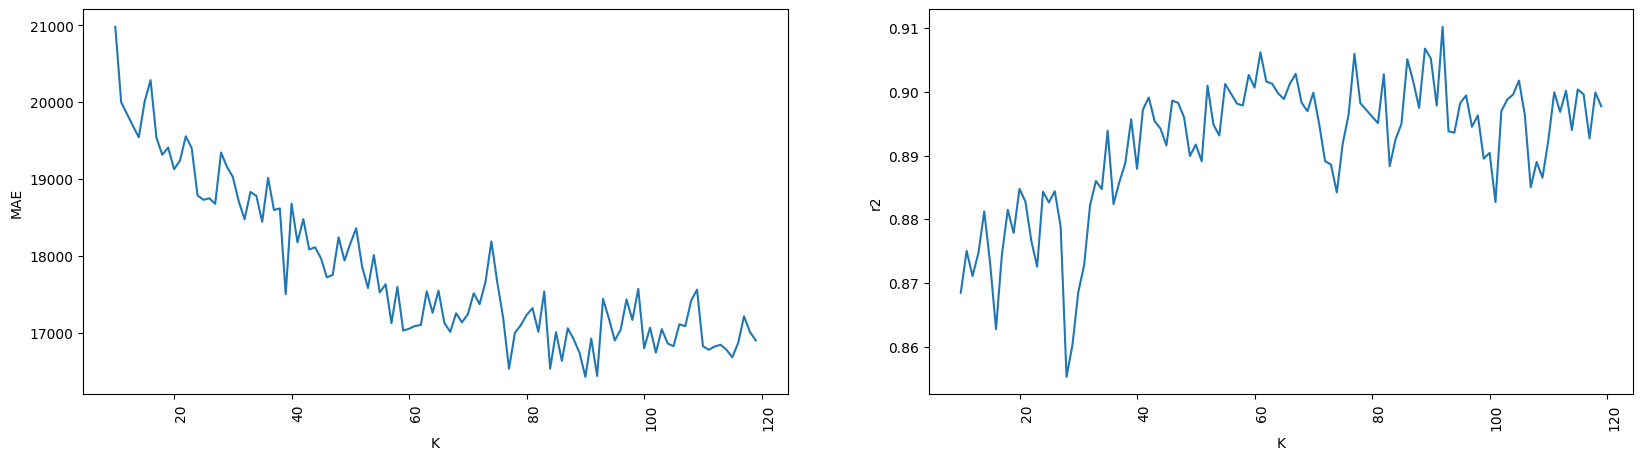

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               1.788113e+03
LotFrontage              4.847253e+02
LotArea                  9.955741e+07
OverallQual              1.911369e+00
OverallCond              1.237474e+00
                             ...     
SaleCondition_Family     1.351098e-02
SaleCondition_Normal     1.472490e-01
SaleCondition_Partial    7.828626e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Ageofhouse',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'Condition1_Norm', 'BldgType_1Fam', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng'

In [ ]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

In [ ]:
statistic.sort_values("MAE",ascending=True)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


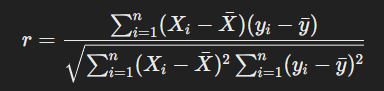

### Using numpy

In [ ]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [ ]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

In [ ]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

### Using sklearn

In [ ]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

In [ ]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


In [ ]:
statistic.sort_values("MAE",ascending=True)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

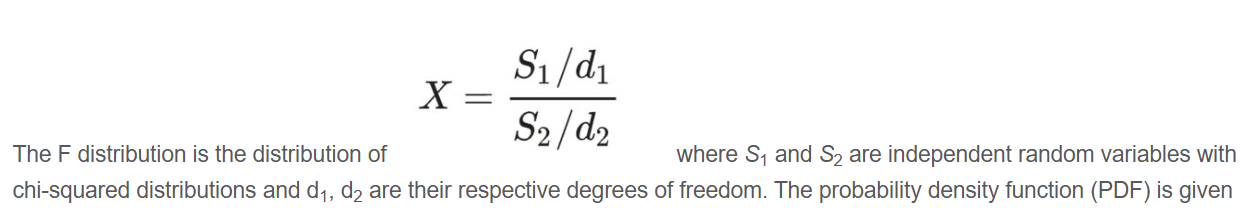

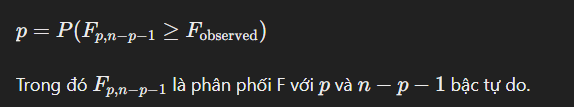

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

In [ ]:
statistic.sort_values("MAE",ascending=True)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

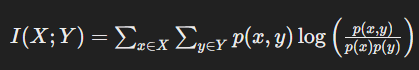

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

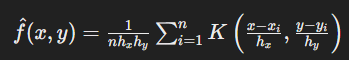

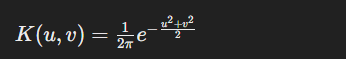

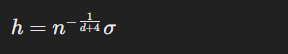

In [ ]:
all_col=df.columns
all_col

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

In [ ]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [ ]:
statistic.sort_values("MAE",ascending=True)

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [ ]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

In [ ]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

In [ ]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

In [ ]:
joint=pd.merge(r,f,how='inner',on="K")
joint

In [ ]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()